In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score, ConfusionMatrixDisplay, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

base_path = Path('./data')

X_train = np.load(base_path / 'train_images.npy').astype(np.float32)
Y_train = np.load(base_path / 'train_labels.npy')

X_test = np.load(base_path / 'test_public_images.npy').astype(np.float32)
Y_test = np.load(base_path / 'test_public_labels.npy')

classes, counts = np.unique(Y_train, return_counts=True)
counts_test = np.unique(Y_test, return_counts=True)[1]

classes_names = [
    "Avoine d'hiver",
    "Avoine de printemps",
    "Blé tendre d'hiver",
    "Blé tendre de printemps",
    "Colza d'hiver",
    "Luzerne déshydratée",
    "Luzerne",
    "Mélange de légumineuses et graminées",
    "Maïs",
    "Maïs ensilage",
    "Orge d'hiver",
    "Orge de printemps",
    "Prairie permanente - herbe",
    "Prairie permanente - ressources fourragères ligneuses",
    "Prairie en rotation longue",
    "Pomme de terre de consommation",
    "Prairie temporaire",
    "Soja",
    "Tournesol",
    "Triticale d'hiver"
]

# Poids des classes pour gérer le déséquilibre 
#class_weights = {i: 1 / count for i, count in zip(classes, counts)}
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(Y_train),y=Y_train)
class_weights = dict(zip(np.unique(Y_train), class_weights))

2025-01-12 17:57:09.447096: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-12 17:57:09.460058: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-12 17:57:09.573734: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-12 17:57:09.738122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736701029.825854  145863 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736701029.85

## FEVRIER MARS

In [8]:
# Février et Mars
X_train_2months = X_train[:, 0:2]  # Garde les données des mois 0 (Février) et 1 (Mars)
X_test_2months = X_test[:, 0:2]

# Vérifiez les nouvelles dimensions
print("X_train_2months shape:", X_train_2months.shape)  # (10000, 2, 3, 32, 32)
print("X_test_2months shape:", X_test_2months.shape)    # (2500, 2, 3, 32, 32)


X_train_2months shape: (10000, 2, 3, 32, 32)
X_test_2months shape: (2500, 2, 3, 32, 32)


In [9]:
# Aplatir seulement les données des 2 mois
X_train_2months_flattened = X_train_2months.reshape(X_train_2months.shape[0], -1)
X_test_2months_flattened = X_test_2months.reshape(X_test_2months.shape[0], -1)

print("X_train_2months_flattened shape:", X_train_2months_flattened.shape)


X_train_2months_flattened shape: (10000, 6144)


In [10]:
# Standardiser les données des 2 mois
scaler = StandardScaler()
X_train_2months_scaled = scaler.fit_transform(X_train_2months_flattened)
X_test_2months_scaled = scaler.transform(X_test_2months_flattened)

print("X_train_2months_scaled shape:", X_train_2months_scaled.shape)


X_train_2months_scaled shape: (10000, 6144)


/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.29


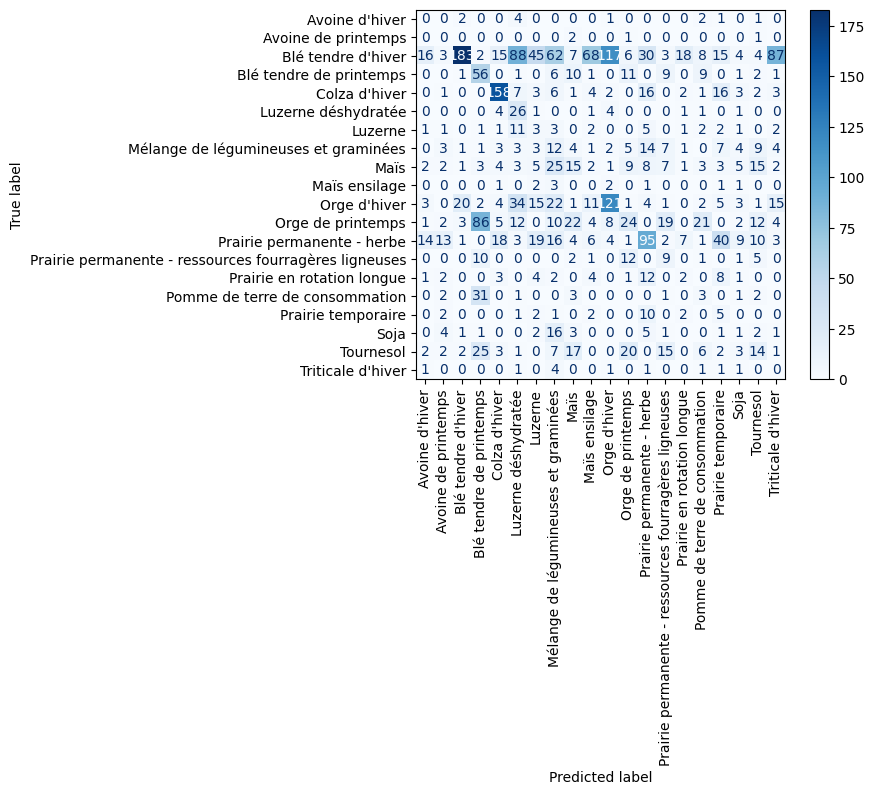

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        11
     Class 1       0.00      0.00      0.00         4
     Class 2       0.85      0.23      0.37       781
     Class 3       0.26      0.52      0.34       108
     Class 4       0.72      0.70      0.71       225
     Class 5       0.13      0.67      0.22        39
     Class 6       0.03      0.08      0.04        36
     Class 7       0.06      0.14      0.09        84
     Class 8       0.16      0.13      0.14       116
     Class 9       0.00      0.00      0.00        11
    Class 10       0.46      0.46      0.46       265
    Class 11       0.26      0.10      0.15       235
    Class 12       0.47      0.36      0.41       266
    Class 13       0.12      0.22      0.16        41
    Class 14       0.06      0.05      0.05        40
    Class 15       0.05      0.07      0.06        44
    Class 16       0.05      0.20      0.08        25
    

In [11]:
log_reg2 = LogisticRegression(class_weight=class_weights, solver='lbfgs', multi_class='multinomial', penalty=None)
log_reg2.fit(X_train_2months_scaled, Y_train)
# Prédictions
Y_pred = log_reg2.predict(X_test_2months_scaled)

# Évaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=[f"Class {i}" for i in range(len(classes))]))
#solver ça calcul la perte, à vérifier

On répète le processus pour les autres mois 2 par 2

## AVRIL MAI

In [6]:
X_train = np.load(base_path / 'train_images.npy').astype(np.float32)
Y_train = np.load(base_path / 'train_labels.npy')

X_test = np.load(base_path / 'test_public_images.npy').astype(np.float32)
Y_test = np.load(base_path / 'test_public_labels.npy')


X_train_2months = X_train[:, 2:4]  # Avril (2) et Mai (3)
X_test_2months = X_test[:, 2:4]

print("X_train_2months shape:", X_train_2months.shape)
print("X_test_2months shape:", X_test_2months.shape)

# Aplatir seulement les données des 2  mois
X_train_2months_flattened = X_train_2months.reshape(X_train_2months.shape[0], -1)
X_test_2months_flattened = X_test_2months.reshape(X_test_2months.shape[0], -1)

print("X_train_2months_flattened shape:", X_train_2months_flattened.shape)

# Standardiser les données des 2  mois
scaler = StandardScaler()
X_train_2months_scaled = scaler.fit_transform(X_train_2months_flattened)
X_test_2months_scaled = scaler.transform(X_test_2months_flattened)

print("X_train_2months_scaled shape:", X_train_2months_scaled.shape)


X_train_2months shape: (10000, 2, 3, 32, 32)
X_test_2months shape: (2500, 2, 3, 32, 32)
X_train_2months_flattened shape: (10000, 6144)
X_train_2months_scaled shape: (10000, 6144)


/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.41


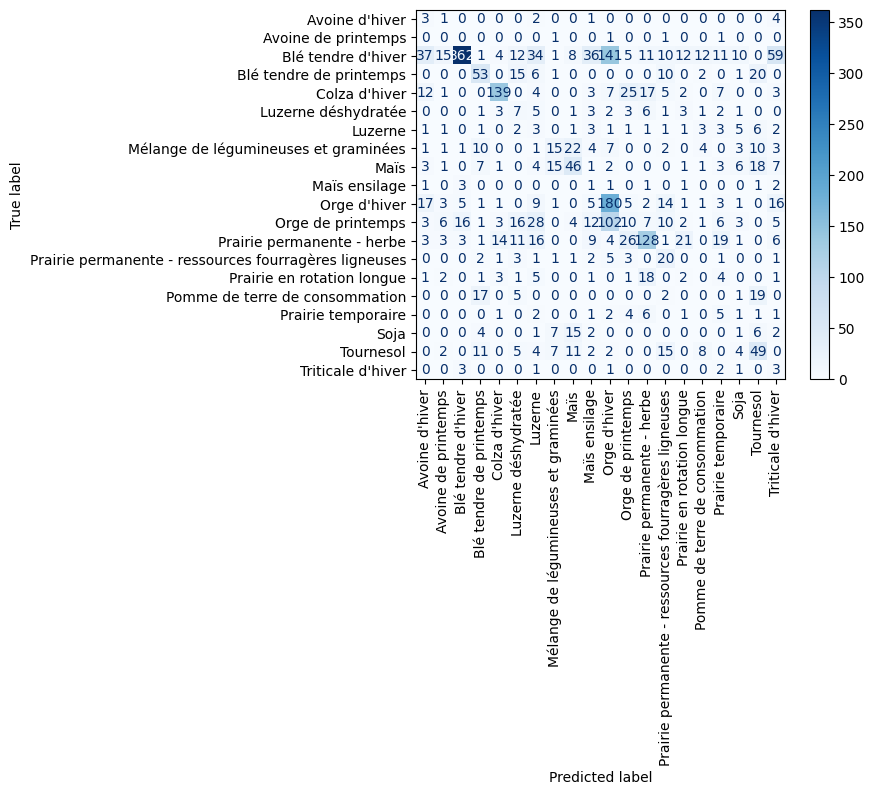

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.04      0.27      0.06        11
     Class 1       0.00      0.00      0.00         4
     Class 2       0.92      0.46      0.62       781
     Class 3       0.48      0.49      0.48       108
     Class 4       0.82      0.62      0.70       225
     Class 5       0.09      0.18      0.12        39
     Class 6       0.02      0.08      0.04        36
     Class 7       0.31      0.18      0.23        84
     Class 8       0.42      0.40      0.41       116
     Class 9       0.01      0.09      0.02        11
    Class 10       0.39      0.68      0.50       265
    Class 11       0.12      0.04      0.06       235
    Class 12       0.65      0.48      0.55       266
    Class 13       0.22      0.49      0.30        41
    Class 14       0.04      0.05      0.05        40
    Class 15       0.00      0.00      0.00        44
    Class 16       0.07      0.20      0.11        25
    

In [7]:
log_reg2 = LogisticRegression(class_weight=class_weights, solver='lbfgs', multi_class='multinomial', penalty=None)
log_reg2.fit(X_train_2months_scaled, Y_train)
# Prédictions
Y_pred = log_reg2.predict(X_test_2months_scaled)

# Évaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=[f"Class {i}" for i in range(len(classes))]))


## JUIN JUILLET

In [ ]:
X_train = np.load(base_path / 'train_images.npy').astype(np.float32)
Y_train = np.load(base_path / 'train_labels.npy')

X_test = np.load(base_path / 'test_public_images.npy').astype(np.float32)
Y_test = np.load(base_path / 'test_public_labels.npy')


# Juin et Juillet
X_train_2months = X_train[:, 4:6]  # Garde les données des mois 4 (Juin) et 5 (Juillet)
X_test_2months = X_test[:, 4:6]

print("X_train_2months shape:", X_train_2months.shape)
print("X_test_2months shape:", X_test_2months.shape)


# Aplatir seulement les données des 2  mois
X_train_2months_flattened = X_train_2months.reshape(X_train_2months.shape[0], -1)
X_test_2months_flattened = X_test_2months.reshape(X_test_2months.shape[0], -1)

print("X_train_2months_flattened shape:", X_train_2months_flattened.shape)

# Standardiser les données des 2  mois
scaler = StandardScaler()
X_train_2months_scaled = scaler.fit_transform(X_train_2months_flattened)
X_test_2months_scaled = scaler.transform(X_test_2months_flattened)

print("X_train_2months_scaled shape:", X_train_2months_scaled.shape)

X_train_2months shape: (10000, 2, 3, 32, 32)
X_test_2months shape: (2500, 2, 3, 32, 32)
X_train_2months_flattened shape: (10000, 6144)
X_train_2months_scaled shape: (10000, 6144)


/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.35


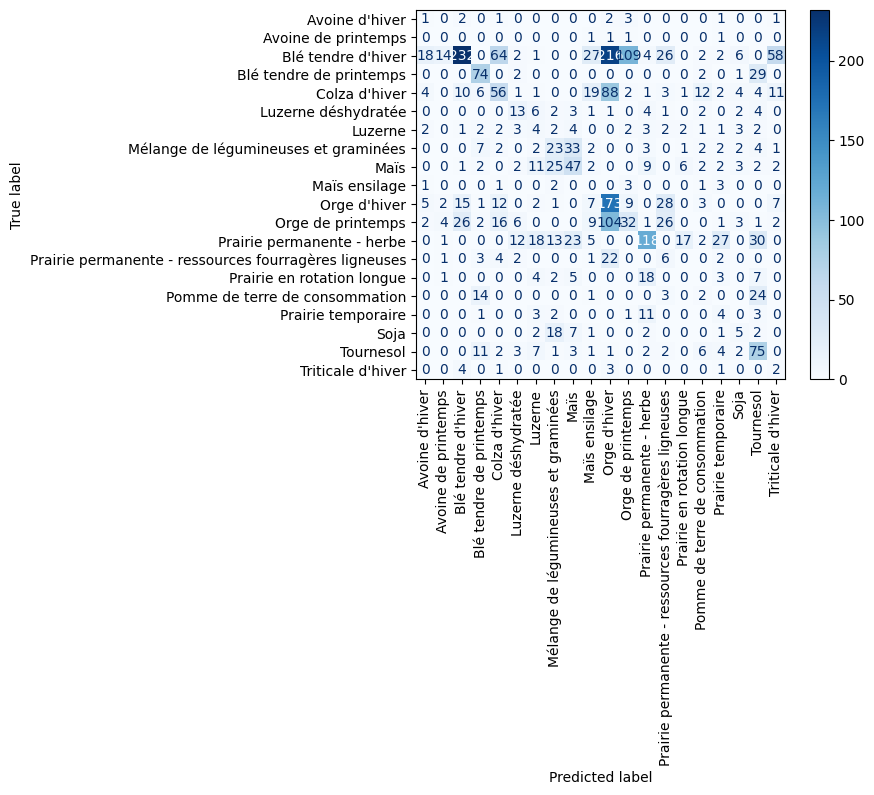

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.03      0.09      0.05        11
     Class 1       0.00      0.00      0.00         4
     Class 2       0.80      0.30      0.43       781
     Class 3       0.60      0.69      0.64       108
     Class 4       0.35      0.25      0.29       225
     Class 5       0.28      0.33      0.31        39
     Class 6       0.07      0.11      0.08        36
     Class 7       0.25      0.27      0.26        84
     Class 8       0.38      0.41      0.39       116
     Class 9       0.00      0.00      0.00        11
    Class 10       0.28      0.65      0.39       265
    Class 11       0.20      0.14      0.16       235
    Class 12       0.67      0.44      0.53       266
    Class 13       0.06      0.15      0.09        41
    Class 14       0.00      0.00      0.00        40
    Class 15       0.05      0.05      0.05        44
    Class 16       0.07      0.16      0.10        25
    

In [ ]:
log_reg2 = LogisticRegression(class_weight=class_weights, solver='lbfgs', multi_class='multinomial', penalty=None)
log_reg2.fit(X_train_2months_scaled, Y_train)
# Prédictions
Y_pred = log_reg2.predict(X_test_2months_scaled)

# Évaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=[f"Class {i}" for i in range(len(classes))]))


## AOUT SEPTEMBRE

In [ ]:
X_train = np.load(base_path / 'train_images.npy').astype(np.float32)
Y_train = np.load(base_path / 'train_labels.npy')

X_test = np.load(base_path / 'test_public_images.npy').astype(np.float32)
Y_test = np.load(base_path / 'test_public_labels.npy')


# Août et Septembre
X_train_2months = X_train[:, 6:8]  # Garde les données des mois 6 (Août) et 7 (Septembre)
X_test_2months = X_test[:, 6:8]

print("X_train_2months shape:", X_train_2months.shape)
print("X_test_2months shape:", X_test_2months.shape)



# Aplatir seulement les données des 2  mois
X_train_2months_flattened = X_train_2months.reshape(X_train_2months.shape[0], -1)
X_test_2months_flattened = X_test_2months.reshape(X_test_2months.shape[0], -1)

print("X_train_2months_flattened shape:", X_train_2months_flattened.shape)

# Standardiser les données des 2  mois
scaler = StandardScaler()
X_train_2months_scaled = scaler.fit_transform(X_train_2months_flattened)
X_test_2months_scaled = scaler.transform(X_test_2months_flattened)

print("X_train_2months_scaled shape:", X_train_2months_scaled.shape)

X_train_2months shape: (10000, 2, 3, 32, 32)
X_test_2months shape: (2500, 2, 3, 32, 32)
X_train_2months_flattened shape: (10000, 6144)
X_train_2months_scaled shape: (10000, 6144)


/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.31


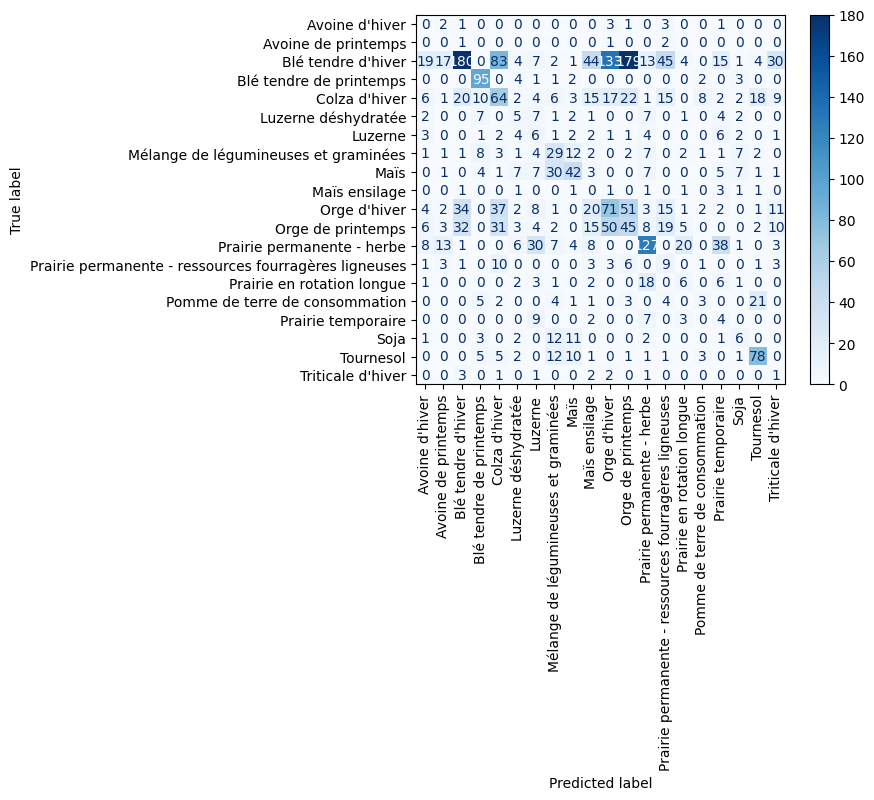

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        11
     Class 1       0.00      0.00      0.00         4
     Class 2       0.65      0.23      0.34       781
     Class 3       0.69      0.88      0.77       108
     Class 4       0.27      0.28      0.28       225
     Class 5       0.11      0.13      0.12        39
     Class 6       0.07      0.17      0.09        36
     Class 7       0.27      0.35      0.30        84
     Class 8       0.46      0.36      0.41       116
     Class 9       0.00      0.00      0.00        11
    Class 10       0.25      0.27      0.26       265
    Class 11       0.14      0.19      0.16       235
    Class 12       0.61      0.48      0.54       266
    Class 13       0.08      0.22      0.12        41
    Class 14       0.14      0.15      0.14        40
    Class 15       0.15      0.07      0.09        44
    Class 16       0.05      0.16      0.07        25
    

In [15]:
log_reg2 = LogisticRegression(class_weight=class_weights, solver='lbfgs', multi_class='multinomial', penalty=None)
log_reg2.fit(X_train_2months_scaled, Y_train)
# Prédictions
Y_pred = log_reg2.predict(X_test_2months_scaled)

# Évaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=[f"Class {i}" for i in range(len(classes))]))
#solver ça calcul la perte, à vérifier

## OCTOBRE NOVEMBRE

In [ ]:
X_train = np.load(base_path / 'train_images.npy').astype(np.float32)
Y_train = np.load(base_path / 'train_labels.npy')

X_test = np.load(base_path / 'test_public_images.npy').astype(np.float32)
Y_test = np.load(base_path / 'test_public_labels.npy')


X_train_2months = X_train[:, 8:10]  # Octobre (8) et Novembre (9)
X_test_2months = X_test[:, 8:10]

print("X_train_2months shape:", X_train_2months.shape)
print("X_test_2months shape:", X_test_2months.shape)



# Aplatir seulement les données des 2  mois
X_train_2months_flattened = X_train_2months.reshape(X_train_2months.shape[0], -1)
X_test_2months_flattened = X_test_2months.reshape(X_test_2months.shape[0], -1)

print("X_train_2months_flattened shape:", X_train_2months_flattened.shape)

# Standardiser les données des 2  mois
scaler = StandardScaler()
X_train_2months_scaled = scaler.fit_transform(X_train_2months_flattened)
X_test_2months_scaled = scaler.transform(X_test_2months_flattened)

print("X_train_2months_scaled shape:", X_train_2months_scaled.shape)

X_train_2months shape: (10000, 2, 3, 32, 32)
X_test_2months shape: (2500, 2, 3, 32, 32)
X_train_2months_flattened shape: (10000, 6144)
X_train_2months_scaled shape: (10000, 6144)


/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.15


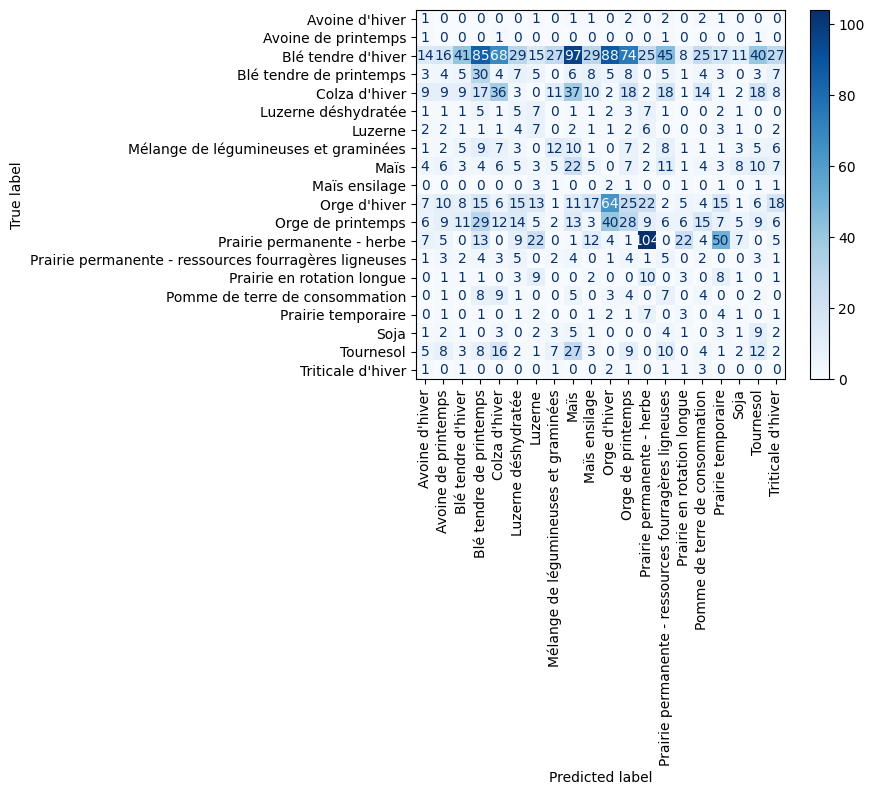

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.02      0.09      0.03        11
     Class 1       0.00      0.00      0.00         4
     Class 2       0.45      0.05      0.09       781
     Class 3       0.13      0.28      0.18       108
     Class 4       0.21      0.16      0.18       225
     Class 5       0.05      0.13      0.07        39
     Class 6       0.07      0.19      0.11        36
     Class 7       0.17      0.14      0.15        84
     Class 8       0.09      0.19      0.12       116
     Class 9       0.00      0.00      0.00        11
    Class 10       0.30      0.24      0.27       265
    Class 11       0.14      0.12      0.13       235
    Class 12       0.53      0.39      0.45       266
    Class 13       0.04      0.12      0.06        41
    Class 14       0.06      0.07      0.06        40
    Class 15       0.05      0.09      0.06        44
    Class 16       0.03      0.16      0.06        25
    

: 

In [ ]:
log_reg2 = LogisticRegression(class_weight=class_weights, solver='lbfgs', multi_class='multinomial', penalty=None)
log_reg2.fit(X_train_2months_scaled, Y_train)
# Prédictions
Y_pred = log_reg2.predict(X_test_2months_scaled)

# Évaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=[f"Class {i}" for i in range(len(classes))]))
#solver ça calcul la perte, à vérifier

## Maintenant on fait avec tous les mois

In [3]:
X_train = np.load(base_path / 'train_images.npy').astype(np.float32)
Y_train = np.load(base_path / 'train_labels.npy')

X_test = np.load(base_path / 'test_public_images.npy').astype(np.float32)
Y_test = np.load(base_path / 'test_public_labels.npy')


In [4]:
# Aplatir les données pour les forêts et regressions
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # (10000, 10*3*32*32)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)     # (2500, 10*3*32*32)

# Standardisation pour la régression logistique 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# Poids des classes pour gérer le déséquilibre 
#class_weights = {i: 1 / count for i, count in zip(classes, counts)}
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(Y_train),y=Y_train)
class_weights = dict(zip(np.unique(Y_train), class_weights))

# Poids des mois d'Avril et Mai
month_weights = np.ones(X_train.shape[1])  # Poids par défaut = 1 pour tous les mois
month_weights[3] = 2.0  # Poids plus élevé pour Avril (indice 3)
month_weights[4] = 2.0  # Poids plus élevé pour Mai (indice 4)

# Calculer le poids des échantillons en fonction des mois discriminants
sample_weights = np.ones(Y_train.shape[0])  # Poids par défaut de 1 pour chaque échantillon
for i in range(Y_train.shape[0]):
    # Vérifier si les mois d'avril ou mai contiennent des informations importantes
    if np.any(X_train[i, 3:5]):
        sample_weights[i] *= 2.0  # Augmenter le poids des échantillons avec des mois critiques


/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.62


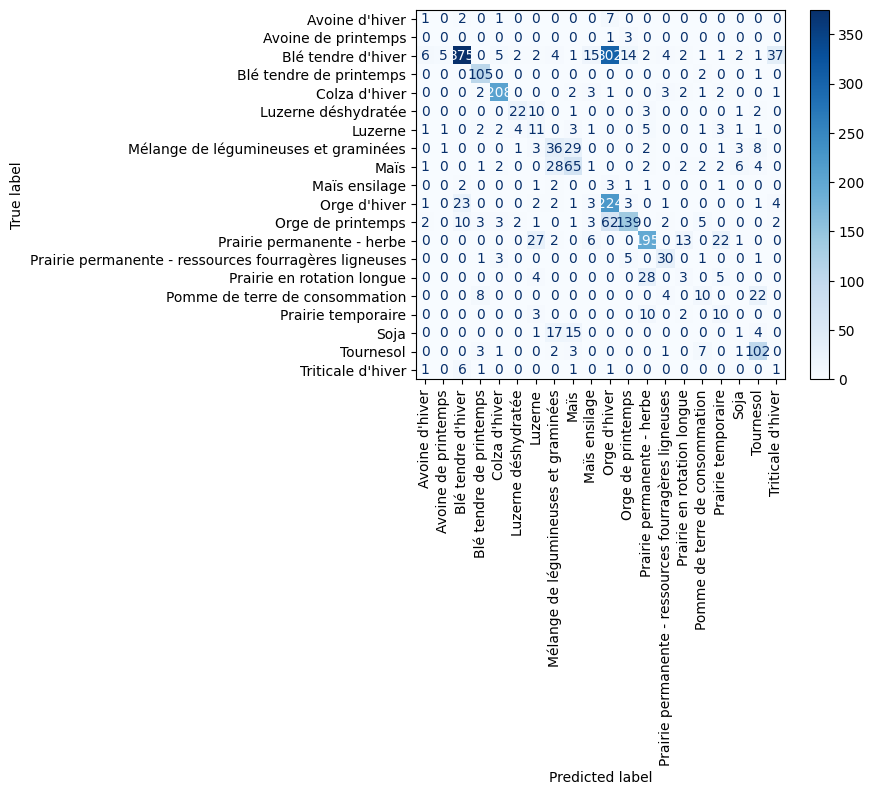

Classification Report:
                                                       precision    recall  f1-score   support

                                       Avoine d'hiver       0.08      0.09      0.08        11
                                  Avoine de printemps       0.00      0.00      0.00         4
                                   Blé tendre d'hiver       0.90      0.48      0.63       781
                              Blé tendre de printemps       0.83      0.97      0.90       108
                                        Colza d'hiver       0.92      0.92      0.92       225
                                  Luzerne déshydratée       0.71      0.56      0.63        39
                                              Luzerne       0.17      0.31      0.22        36
                 Mélange de légumineuses et graminées       0.39      0.43      0.41        84
                                                 Maïs       0.53      0.56      0.55       116
                          

In [5]:

# Entraîner le modèle avec les poids d'échantillons
log_reg2 = LogisticRegression(class_weight=class_weights, solver='lbfgs', multi_class='multinomial', penalty=None)
log_reg2.fit(X_train_scaled, Y_train)

# Prédictions
Y_pred = log_reg2.predict(X_test_scaled)

# Évaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Matrice de confusion
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

# Rapport de classification
print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=classes_names))

In [3]:
# Préparation des données
X_train = X_train.transpose(0, 1, 3, 4, 2)  # (10000, 10, 32, 32, 3)
X_test = X_test.transpose(0, 1, 3, 4, 2)    # (2500, 10, 32, 32, 3)

# Normalisation des pixels
X_train_norm = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test_norm = (X_test - np.min(X_train)) / (np.max(X_train) - np.min(X_train))

In [4]:
# Exemple avec TensorFlow
import tensorflow as tf

model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(10, 32, 32, 3)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    #Dropout(0.5),
    Dense(20, activation='softmax')
])

/home/musab_karatas/tensorflow_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1736690938.302368   75019 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:


def weighted_loss(y_true, y_pred):
    # Exemple de tableau de poids pour les mois
    month_weights = tf.constant([1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0])  # Avril et Mai ont un poids de 2
    weights = tf.reduce_mean(month_weights)  # Calcule un poids moyen

    # Calcul de la perte pondérée
    loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    weighted_loss = loss * weights
    return tf.reduce_mean(weighted_loss)

# Utilisation dans un modèle Keras
model.compile(optimizer='adam', loss=weighted_loss, metrics=['accuracy'])


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy')

# Entraînement
history = model.fit(X_train_norm, Y_train, validation_data=(X_test_norm, Y_test), epochs=15, batch_size=32, callbacks=[callback], class_weight=class_weights)

# Évaluation
loss, accuracy = model.evaluate(X_test_norm, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")
y_prob = model.predict(X_test_norm)
y_pred = y_prob.argmax(axis=-1)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.6640 - loss: 0.7725 - val_accuracy: 0.4964 - val_loss: 1.6013
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6534 - loss: 0.7568 - val_accuracy: 0.4652 - val_loss: 1.6049
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4789 - loss: 1.5792
Loss: 1.6049209833145142, Accuracy: 0.4652000069618225
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
